In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
# !pip install pykalman
from pykalman import KalmanFilter

In [3]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,12)

In [4]:
df = pdr.DataReader('GOOG', 'yahoo', start='2010-08-25', end='2021-08-25')

In [5]:
x = df['Adj Close']

In [6]:
# Compute the rolling mean with various lookback windows
mean30 = x.rolling(window = 30).mean()
mean60 = x.rolling(window = 60).mean()
mean90 = x.rolling(window = 90).mean()

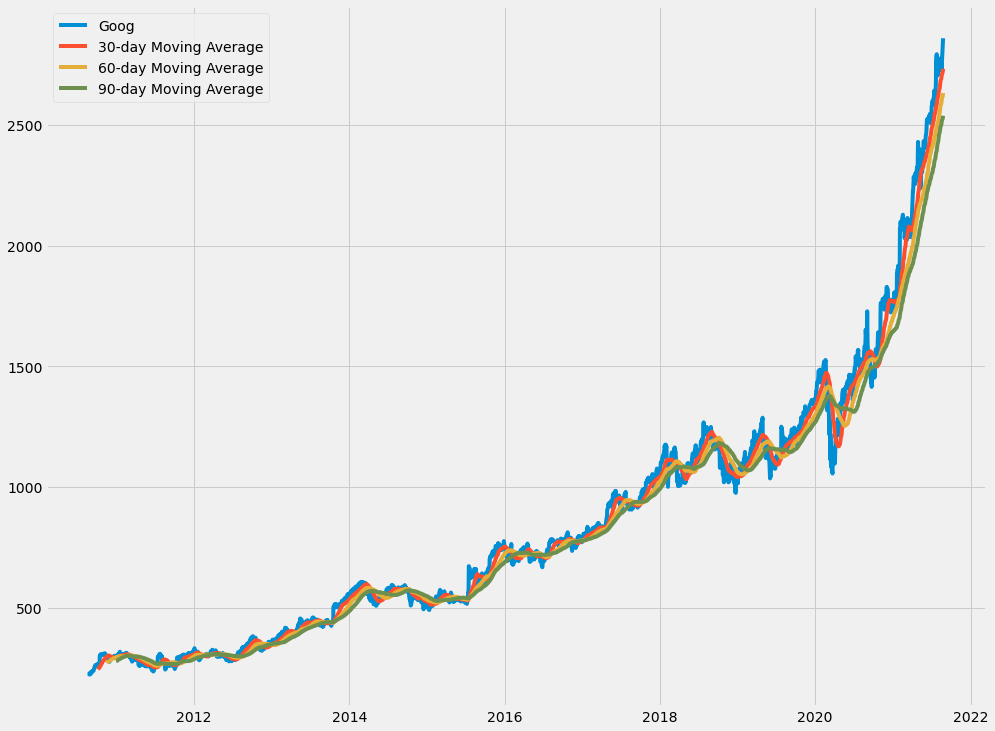

In [7]:
plt.plot(x)
plt.plot(mean30)
plt.plot(mean60)
plt.plot(mean90)
plt.legend(['Goog', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])

In [8]:
#Zooming into last years data
x1 = df['Adj Close']['2020-08-21':]

In [9]:
x1_mean30 = x1.rolling(window = 30).mean()
x1_mean60 = x1.rolling(window = 60).mean()
x1_mean90 = x1.rolling(window = 90).mean()

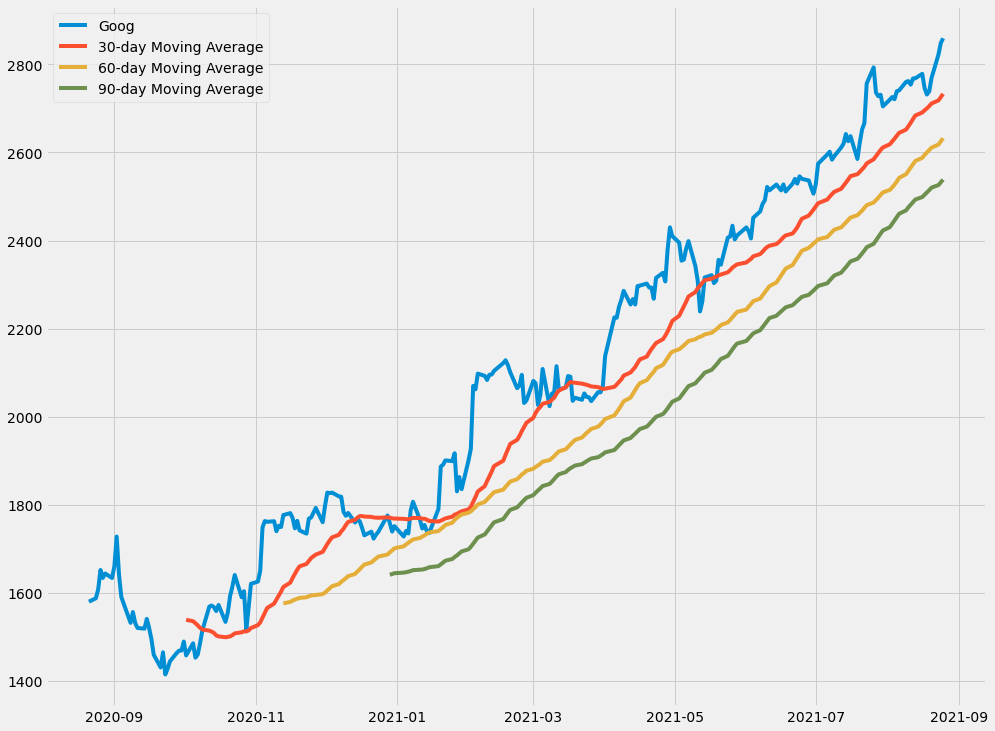

In [10]:
plt.plot(x1)
plt.plot(x1_mean30)
plt.plot(x1_mean60)
plt.plot(x1_mean90)
plt.legend(['Goog', '30-day Moving Average', '60-day Moving Average','90-day Moving Average'])

In [39]:
# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=0.01)

# Use the observed values to get a 'implied' rolling mean
state_means, _ = kf.filter(x1.values)
state_means = pd.Series(state_means.flatten(), index=x1.index)

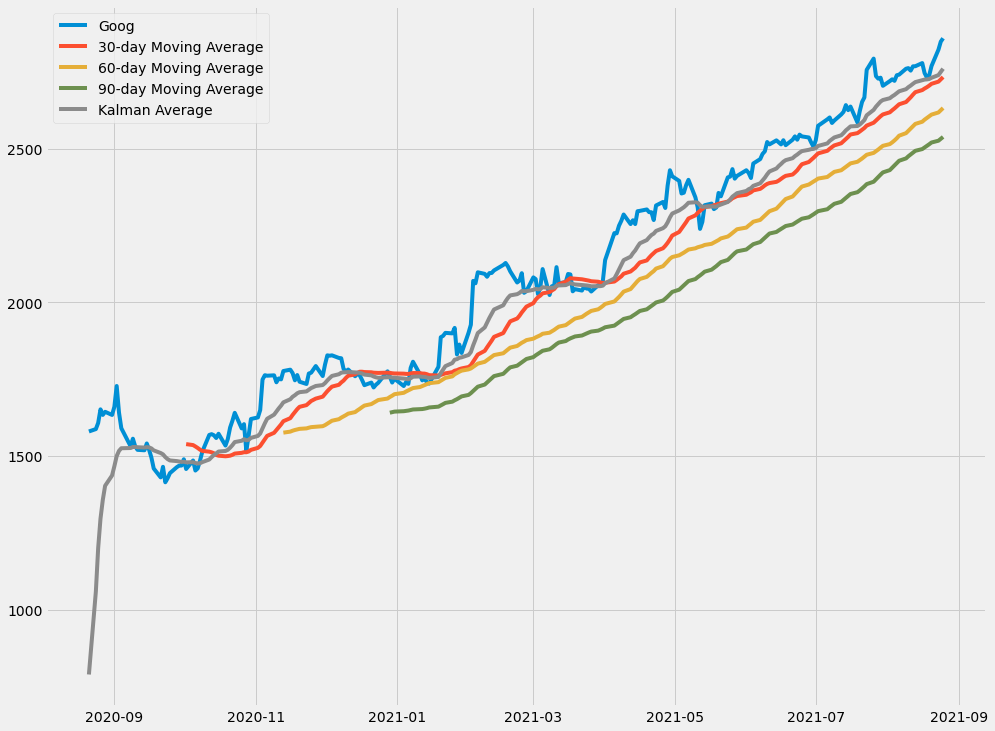

In [40]:
plt.plot(x1)
plt.plot(x1_mean30)
plt.plot(x1_mean60)
plt.plot(x1_mean90)
plt.plot(state_means)
plt.legend(['Goog', '30-day Moving Average', '60-day Moving Average','90-day Moving Average','Kalman Average'])